## Sendy Logistics Challenge

#### Predict the estimated time of arrival (ETA) for motorbike deliveries in Nairobi

**Task**: Predict the time in seconds for Nairobian bike deliveries

**Approach**:

    - Linear Regression (quantitative response)
    - transit_time ~ orders + age + ?

In [19]:
import pandas as pd 
import numpy as np
import missingno as msno

In [3]:
riders = pd.read_csv("data/riders.csv")
sampsub = pd.read_csv("data/sample_submission.csv")
test = pd.read_csv("data/test.csv")

In [20]:
# rename cols-- easier to work with
riders.rename(columns= {
    "Rider Id": "id",
    "No_Of_Orders": "orders",
    "Age": "age",
    "Average_Rating": "average_rating",
    "No_of_Ratings": "number_rating" 
}, inplace=True)

# drop "Rider_Id_" in "id" column
riders.id.replace('Rider_Id_', ' ',regex=True,inplace=True)


,id,orders,age,average_rating,number_rating
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156
...,...,...,...,...,...
955,896,152,99,12.4,18
956,149,69,101,10.2,10
957,270,338,96,14.4,41
958,201,159,96,15.0,9


In [28]:
sampsub.rename(columns={
    "Order_No": "order",
    "Time from Pickup to Arrival": "transit_time"
}, inplace=True)

sampsub.order.replace("Order_No_", " ", regex=True, inplace=True)

In [29]:
sampsub

,order,transit_time
0,19248,567.0
1,12736,4903.0
2,768,5649.0
3,15332,NaN
4,21373,NaN
...,...,...
7063,3612,NaN
7064,7657,NaN
7065,1969,NaN
7066,10591,NaN


In [6]:
test.dtypes

Order No                                 object
User Id                                  object
Vehicle Type                             object
Platform Type                             int64
Personal or Business                     object
Placement - Day of Month                  int64
Placement - Weekday (Mo = 1)              int64
Placement - Time                         object
Confirmation - Day of Month               int64
Confirmation - Weekday (Mo = 1)           int64
Confirmation - Time                      object
Arrival at Pickup - Day of Month          int64
Arrival at Pickup - Weekday (Mo = 1)      int64
Arrival at Pickup - Time                 object
Pickup - Day of Month                     int64
Pickup - Weekday (Mo = 1)                 int64
Pickup - Time                            object
Distance (KM)                             int64
Temperature                             float64
Precipitation in millimeters            float64
Pickup Lat                              

0.97184493491794

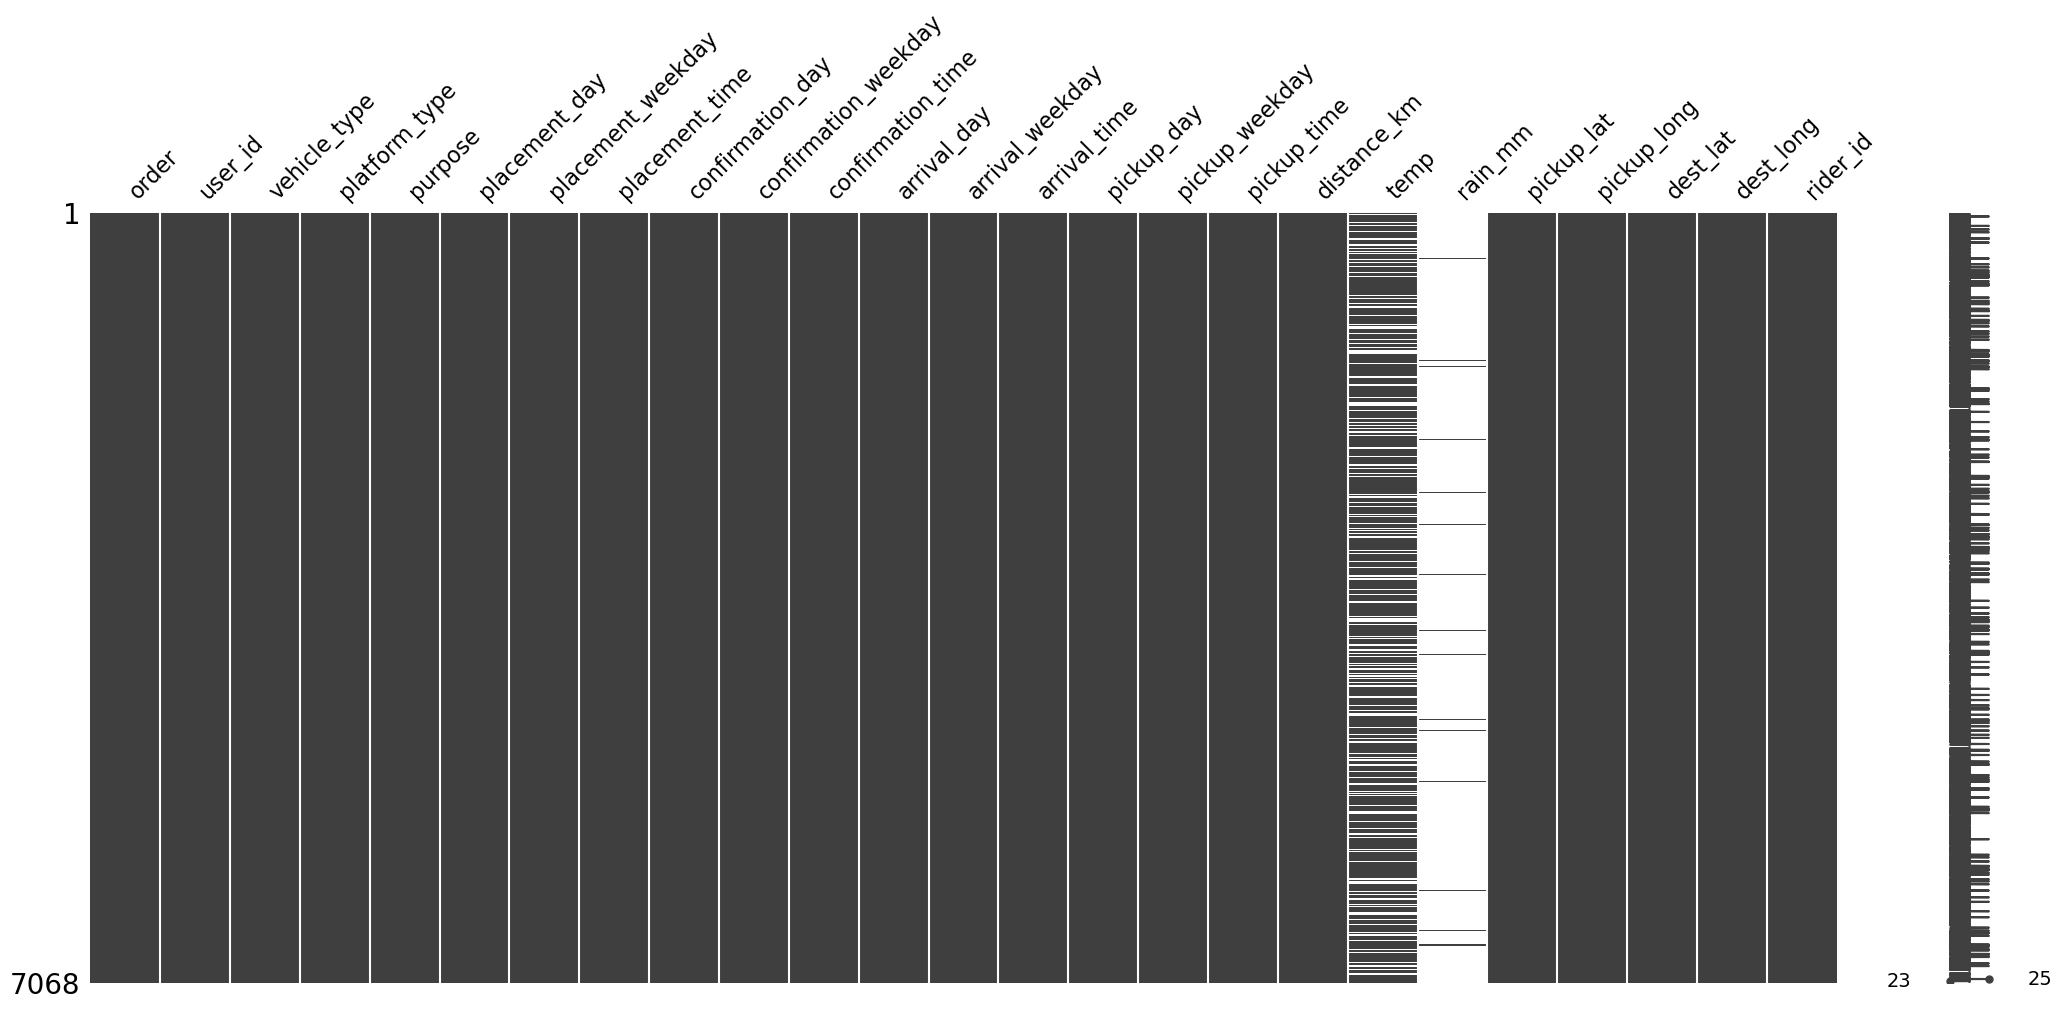

In [24]:
test.rename(columns={
    "Order No": "order",
    "User Id": "user_id",
    "Vehicle Type": "vehicle_type",
    "Platform Type": "platform_type",
    "Personal or Business": "purpose",
    "Placement - Day of Month": "placement_day",
    "Placement - Weekday (Mo = 1)": "placement_weekday",
    "Placement - Time": "placement_time",
    "Confirmation - Day of Month": "confirmation_day",
    "Confirmation - Weekday (Mo = 1)": "confirmation_weekday",
    "Confirmation - Time": "confirmation_time",
    "Arrival at Pickup - Day of Month": "arrival_day",
    "Arrival at Pickup - Weekday (Mo = 1)": "arrival_weekday",
    "Arrival at Pickup - Time": "arrival_time",
    "Pickup - Day of Month": "pickup_day",
    "Pickup - Weekday (Mo = 1)": "pickup_weekday",
    "Pickup - Time": "pickup_time",
    "Distance (KM)": "distance_km",
    "Temperature": "temp",
    "Precipitation in millimeters": "rain_mm",
    "Pickup Lat": "pickup_lat",
    "Pickup Long": "pickup_long",
    "Destination Lat": "dest_lat",
    "Destination Long": "dest_long",
    "Rider Id": "rider_id"
}, inplace=True)

test.order.replace("Order_No_", " ", regex=True, inplace=True)
test.user_id.replace("User_Id_", " ", regex=True, inplace=True)
test.rider_id.replace("Rider_Id_", " ", regex=True, inplace=True)

msno.matrix(test)
(test.rain_mm.isna().sum())/len(test) # 97% of data missing from rain_mm, we can drop
tes